C:\Users\DELL\AppData\Local\Temp\ipykernel_16468\1407414709.py:49: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(transpiled_circuit)


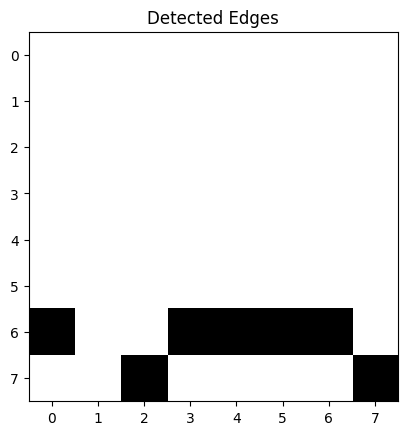

In [4]:
import numpy as np
import cv2
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Normalize the image
    image = image / 255.0
    return image

def image_to_quantum_state(image):
    N1, N2 = image.shape
    N = N1 * N2
    n = int(np.ceil(np.log2(N)))
    
    # Create a quantum circuit with 'n' qubits
    qc = QuantumCircuit(n)
    
    # Encode the image into the quantum circuit
    # Convert image to probabilities
    probabilities = image.flatten()
    
    for i in range(N):
        # Encode pixel intensity as an angle for rotation
        if i < n:
            angle = 2 * np.arccos(probabilities[i] if probabilities[i] > 0 else 1e-10)
            qc.ry(angle, i)
    
    return qc

def apply_qhed(qc):
    num_qubits = qc.num_qubits
    
    # Apply Hadamard gates to all qubits
    for qubit in range(num_qubits):
        qc.h(qubit)
    
    # Add measurement to the quantum circuit
    qc.measure_all()
    
    return qc

def simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(qc, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qc).result()
    counts = result.get_counts()
    return counts

def display_edge_image(image, edge_counts):
    # Decode the quantum state back to an image
    edge_image = np.zeros_like(image)
    N1, N2 = image.shape
    for key, value in edge_counts.items():
        # Decode the result (assuming binary encoding for simplicity)
        bit_index = int(key, 2)
        if bit_index < N1 * N2:
            edge_image[bit_index // N2, bit_index % N2] = 1
    
    plt.imshow(edge_image, cmap='gray')
    plt.title('Detected Edges')
    plt.show()

# Main execution
image_path = "D:\\6m_NIC\\images\\apple1.jpg"
image = load_and_preprocess_image(image_path)

# Use a smaller image for debugging
if image.size > 64:
    image = cv2.resize(image, (8, 8))  # Resize for debugging purposes

quantum_circuit = image_to_quantum_state(image)
quantum_circuit_with_edges = apply_qhed(quantum_circuit)
edge_counts = simulate_circuit(quantum_circuit_with_edges)
display_edge_image(image, edge_counts)


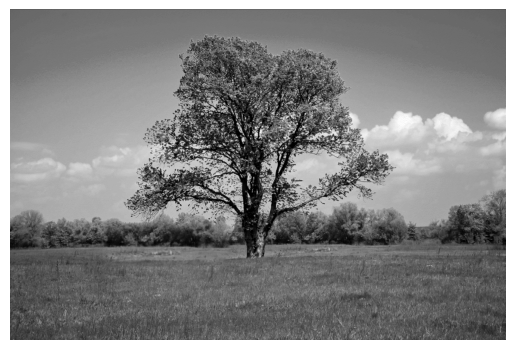

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_o = Image.open(r"D:\6m_NIC\images\trees.jpg").convert('1')

# Convert image to array
imggg = np.array(image_o)

# Display the image
plt.imshow(imggg, cmap='gray')
plt.axis('on')  # Hide axes
plt.show()


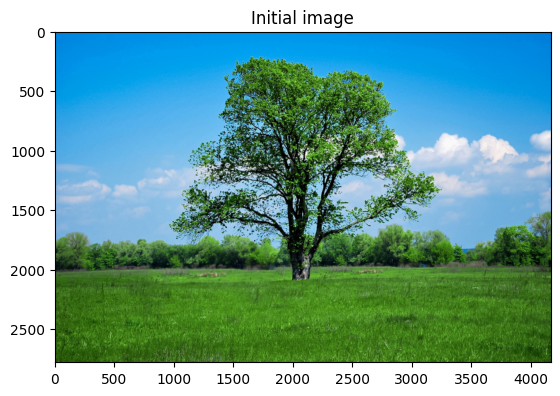

size= (2778, 4169, 3)


In [9]:
import matplotlib.pyplot as plt

def plot_image(image_array, title):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('on')  # Hide axes
    plt.show()

# Load and process the image
image_o = Image.open(r"D:\6m_NIC\images\trees.jpg")
imggg_ = np.array(image_o)

# Use the plot_image function
plot_image(imggg_, 'Initial image')
print("size=", imggg_.shape)


In [10]:
#we encode the intensities of image pixels as probability amplitudes of quantum states
#we use normalization for this
#we normalize the amplitudes to lie in the range (0,1)

# Convert the raw pixel values to probability amplitudes

def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms_32_rgb = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms_32_rgb)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)


#we now normalize image and get coefficients in both horizontal and vertical directions

# Horizontal: Original image
h_norm_image_32_rgb = amplitude_encode(imggg)
print("Horizontal image normalized coefficients",h_norm_image_32_rgb)


print()
print()

# Vertical: Transpose of Original image
v_norm_image_32_rgb = amplitude_encode(imggg.T)
print("vertical image normalized coefficients",v_norm_image_32_rgb)

print()
print("size of 1d array",h_norm_image_32_rgb.shape)
print("size of 1d array",v_norm_image_32_rgb.shape)

Horizontal image normalized coefficients [0.        0.        0.        ... 0.0004321 0.        0.       ]


vertical image normalized coefficients [0.        0.0004321 0.        ... 0.0004321 0.        0.       ]

size of 1d array (11581482,)
size of 1d array (11581482,)


In [20]:
# Part 1: Image Processing and Normalization

from PIL import Image
import numpy as np

def amplitude_encode(img_data):
    # Flatten the image data and calculate the RMS value
    img_data_flat = img_data.flatten()
    rms_value = np.sqrt(np.sum(img_data_flat**2))
    
    # Normalize the image data
    if rms_value == 0:  # Avoid division by zero
        return np.zeros_like(img_data_flat)
    image_norm = img_data_flat / rms_value
    
    # Ensure normalization is correct: sum of squares should be 1
    norm_factor = np.sqrt(np.sum(image_norm**2))
    if norm_factor != 1:
        image_norm /= norm_factor
    
    return image_norm

# Load and process the image
image_path = r"D:\6m_NIC\images\trees.jpg"
image = Image.open(image_path).convert('L')  # Convert to grayscale for simplicity
img_data = np.array(image)

# Resize the image to reduce the number of qubits
img_data_resized = np.array(Image.fromarray(img_data).resize((16, 16)))

# Normalize the image data
h_norm_image_32_rgb = amplitude_encode(img_data_resized)
v_norm_image_32_rgb = amplitude_encode(img_data_resized.T)

print("Horizontal image normalized coefficients", h_norm_image_32_rgb)
print("Vertical image normalized coefficients", v_norm_image_32_rgb)
print("Size of 1D array:", h_norm_image_32_rgb.shape)
print("Size of 1D array:", v_norm_image_32_rgb.shape)


Horizontal image normalized coefficients [0.05354162 0.05505694 0.05657227 0.05758249 0.0580876  0.05909782
 0.06061315 0.06010804 0.05909782 0.05859271 0.05758249 0.05657227
 0.05556205 0.05404673 0.05303651 0.05152118 0.05606716 0.0580876
 0.05960293 0.06061315 0.06212848 0.06212848 0.05404673 0.05909782
 0.06515914 0.06465403 0.06212848 0.05960293 0.0580876  0.05657227
 0.05505694 0.05404673 0.0580876  0.06061315 0.06364381 0.06717957
 0.07122045 0.06465403 0.03889344 0.04293431 0.05556205 0.05606716
 0.06717957 0.06818979 0.06364381 0.06010804 0.05758249 0.05606716
 0.06364381 0.06818979 0.07273578 0.07576644 0.07980731 0.06263359
 0.04141899 0.03838833 0.04040877 0.03788322 0.06010804 0.07728177
 0.07273578 0.0686949  0.06515914 0.06111826 0.07122045 0.07576644
 0.07829199 0.08081753 0.08536352 0.06818979 0.04798541 0.03485256
 0.04091388 0.04293431 0.06515914 0.08384819 0.08182775 0.07778688
 0.07223067 0.07324089 0.07576644 0.0793022  0.08283797 0.08586863
 0.08283797 0.05859271

In [11]:
#we require N=log(32*32) qubits 
#N=10

data_q_32_rgb = 10
ancillary_q_32_rgb = 1
total_q_32_rgb = data_q_32_rgb + ancillary_q_32_rgb

# Initialize the amplitude permutation unitary
Amp_permutation_unitary_32_rgb = np.identity(2**total_q_32_rgb)
print(Amp_permutation_unitary_32_rgb)
Amp_permutation_unitary_32_rgb=np.roll(Amp_permutation_unitary_32_rgb,1,axis=1)
print()
print()
print()
print("shift Amplitude permutation matrix by 1 unit to the right column wise")
print()
print(Amp_permutation_unitary_32_rgb)
print()
print("we will later use this for while applying hadamard operation to image coefficient vectors")
print()
print(Amp_permutation_unitary_32_rgb.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



shift Amplitude permutation matrix by 1 unit to the right column wise

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]

we will later use this for while applying hadamard operation to image coefficient vectors

(2048, 2048)


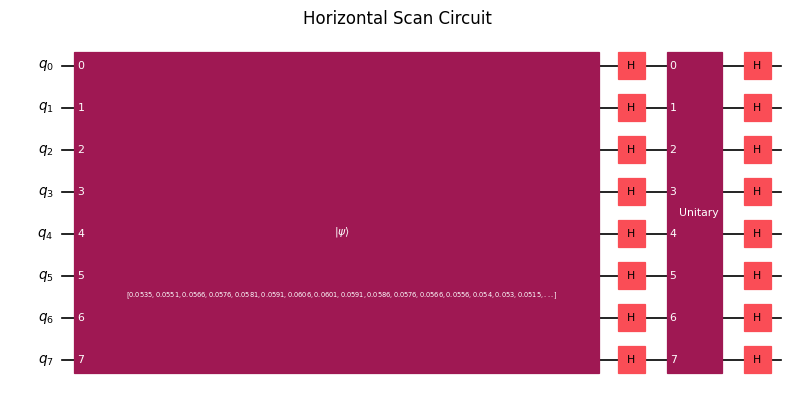

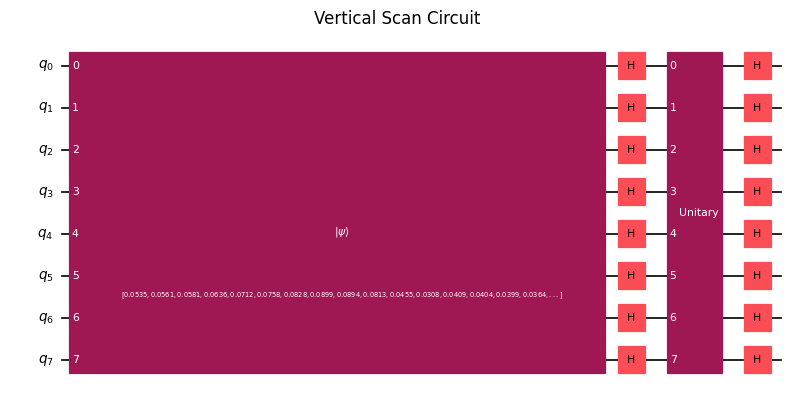

In [21]:
# Part 2: Quantum Circuit Creation and Visualization

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

# Number of qubits
total_q_32_rgb = int(np.log2(h_norm_image_32_rgb.size))

# Define Amp_permutation_unitary_32_rgb (Placeholder - needs to be defined or imported)
# Example placeholder:
Amp_permutation_unitary_32_rgb = np.eye(2**total_q_32_rgb)  # Identity matrix as a placeholder

# Creating the circuit for horizontal scan
qc_h_32_rgb = QuantumCircuit(total_q_32_rgb)
qc_h_32_rgb.initialize(h_norm_image_32_rgb, range(total_q_32_rgb))
qc_h_32_rgb.h(range(total_q_32_rgb))
qc_h_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(total_q_32_rgb))
qc_h_32_rgb.h(range(total_q_32_rgb))

# Draw the circuit for horizontal scan
fig_h, ax_h = plt.subplots(figsize=(10, 6))
ax_h.set_title('Horizontal Scan Circuit')
qc_h_32_rgb.draw('mpl', ax=ax_h)
plt.show()

# Create the circuit for vertical scan
qc_v_32_rgb = QuantumCircuit(total_q_32_rgb)
qc_v_32_rgb.initialize(v_norm_image_32_rgb, range(total_q_32_rgb))
qc_v_32_rgb.h(range(total_q_32_rgb))
qc_v_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(total_q_32_rgb))
qc_v_32_rgb.h(range(total_q_32_rgb))

# Draw the circuit for vertical scan
fig_v, ax_v = plt.subplots(figsize=(10, 6))
ax_v.set_title('Vertical Scan Circuit')
qc_v_32_rgb.draw('mpl', ax=ax_v)
plt.show()

# Combine both circuits into a single list
circ_list_32_rgb = [qc_h_32_rgb, qc_v_32_rgb]


In [22]:
# Simulating cirucits

back = Aer.get_backend('statevector_simulator')
results = back.run(circ_list_32_rgb).result()
state_vector_h_32_rgb = results.get_statevector(qc_h_32_rgb)
state_vector_v_32_rgb = results.get_statevector(qc_v_32_rgb)
print("size is ",state_vector_h_32_rgb.size)
from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(state_vector_h_32_rgb, max_size=128))
print()
print('Vertical scan statevector:')
display(array_to_latex(state_vector_v_32_rgb, max_size=128))


C:\Users\DELL\AppData\Local\Temp\ipykernel_16468\2598228185.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print("size is ",state_vector_h_32_rgb.size)


size is  256
Horizontal scan statevector:


<IPython.core.display.Latex object>


Vertical scan statevector:


<IPython.core.display.Latex object>

In [23]:
#  postprocessing for plotting the output (Classical)

# Defining a lambda function for thresholding to binary values
# returns true for specified Amplitude values else false
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
h_edge_scan_img_32_rgb = np.abs(np.array([1 if threshold(state_vector_h_32_rgb[2*(i)+1].real) else 0 for i in range(2**data_q_32_rgb)])).reshape(32, 32)
v_edge_scan_img_32_rgb= np.abs(np.array([1 if threshold(state_vector_v_32_rgb[2*(i)+1].real) else 0 for i in range(2**data_q_32_rgb)])).reshape(32, 32).T

# Plotting the Horizontal and vertical scans
plot_image(h_edge_scan_img_32_rgb, 'Horizontal scan output')
plot_image(v_edge_scan_img_32_rgb, 'Vertical scan output')

QiskitError: 'Key 257 is greater than Statevector dimension 256.'